# Red Wine Quality

### Importing Libraries

In [375]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploration

In [376]:
df=pd.read_csv("C:\\Users\\91810\\OneDrive\\Pictures\\Desktop\\Intro to DS\\winequality-red.csv")

In [377]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [378]:
df.shape

(1599, 12)

In [379]:
df['Q']=(df['quality']/7).astype(int)

In [380]:
df=df.drop("quality", axis=1)

In [381]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Q  
0      9.4  0  
1      9.8  0  
2      9.8  0  
3      9.8  0  
4      9.4  0

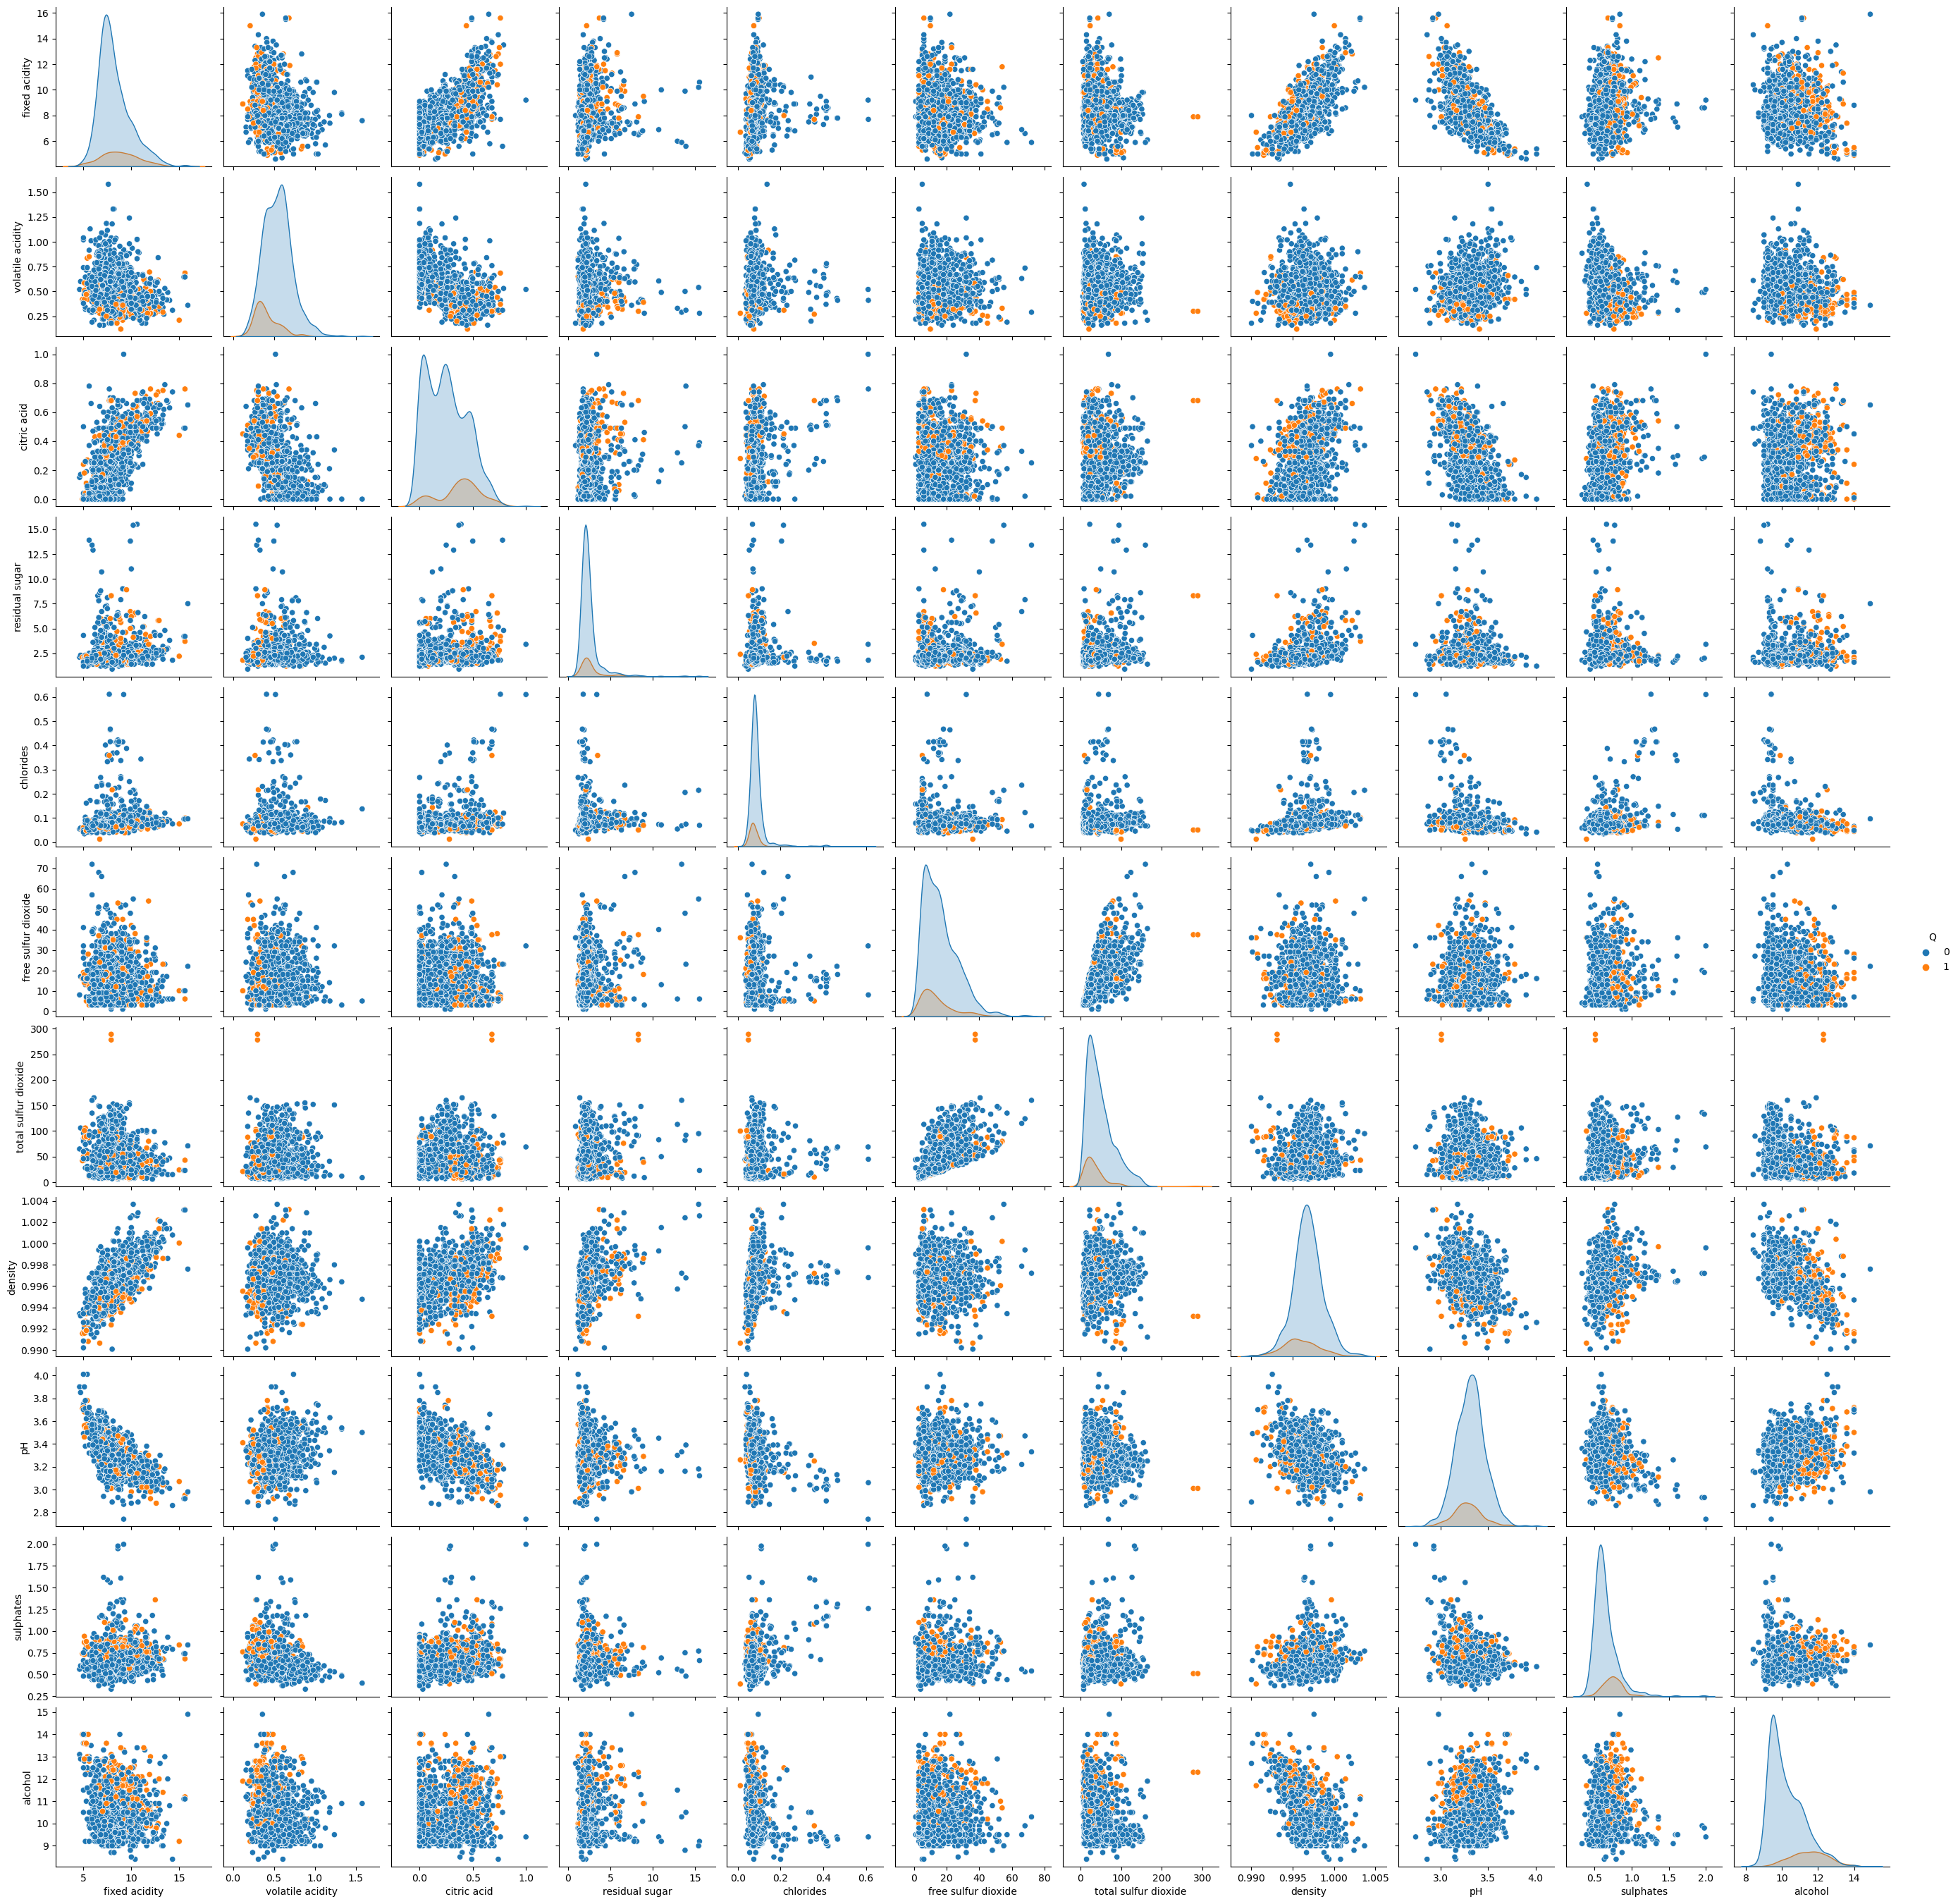

In [382]:
sns.pairplot(df, hue='Q')

<Axes: >

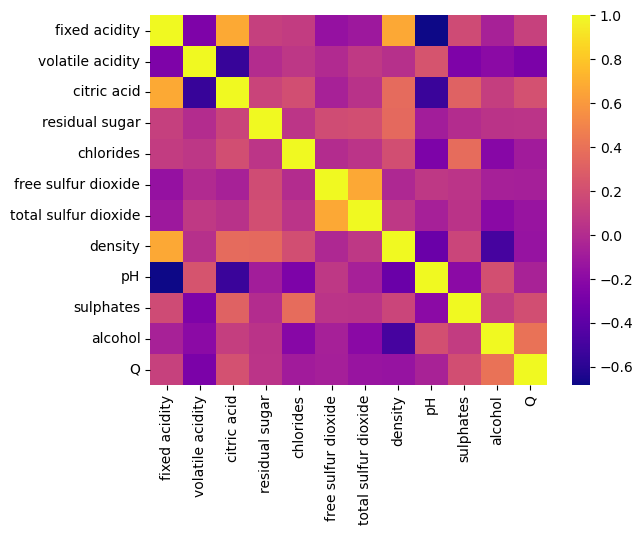

In [383]:
sns.heatmap(df.corr(), cmap="plasma")

## Data Preprocessing

In [384]:
X=df.drop("Q", axis=1)
y=df['Q']

In [385]:
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler
# X=normalize(x)
# The classifiers is performing better with standardisation than normalization
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Decision Tree Classifier

In [387]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

dtc=DecisionTreeClassifier()

In [388]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [389]:
#tree.plot_tree(dtc)

In [390]:
y_out=dtc.predict(X_test)
acc_1=accuracy_score(y_test, y_out)

In [391]:
rep0=classification_report(y_test, y_out)
print(rep0)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.66      0.62      0.64        47

    accuracy                           0.90       320
   macro avg       0.80      0.78      0.79       320
weighted avg       0.89      0.90      0.90       320



In [392]:
print("Accuarcy of Decision Tree Classifier in % : ", acc_1*100)
print("f1 score of Decision Tree Classifier : ", f1_score(y_test, y_out))

Accuarcy of Decision Tree Classifier in % :  89.6875
f1 score of Decision Tree Classifier :  0.6373626373626374


## Random Forest Classifier

In [393]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [394]:
y_pred=rfc.predict(X_test)

In [395]:
acc_2=accuracy_score(y_test, y_pred)

In [396]:
#confusion_matrix(y_test, y_pred)
rep=classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.72      0.55      0.63        47

    accuracy                           0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.90      0.90       320



In [397]:
print("Accuarcy of Random Forest Classifier in % : ", acc_2*100)
print("f1 score of Decision Tree Classifier : ", f1_score(y_test, y_pred))

Accuarcy of Random Forest Classifier in % :  90.3125
f1 score of Decision Tree Classifier :  0.6265060240963856
